# Quick Look At Amir Satvat's Open Position Data
### Data from <a href='https://lnkd.in/etkUuecj'><b>Amir Satvat's LinkedIn Community Jobs Spreadsheet</b></a>
#### A big shoutout to Amir if you don't allow ready follow him on LinkedIn and YouTube check him out: <a href='https://www.linkedin.com/in/amirsatvat/'>linkedin.com/in/amirsatvat/</a> and <a href='youtube.com/@AmirSatvat'>youtube.com/@AmirSatvat</a>



In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from IPython.display import Markdown as md

### Clean up data and set proper datatypes

In [2]:
df = pd.read_csv('AmirJobsClean.csv')
df.fillna(0, inplace=True)
column_names = list(df.columns)
for name in column_names[2:]: df[name] = df[name].astype('int16')

total_jobs = df['Total Jobs'].sum()


### Create pie chart for top 10 companies by open positions

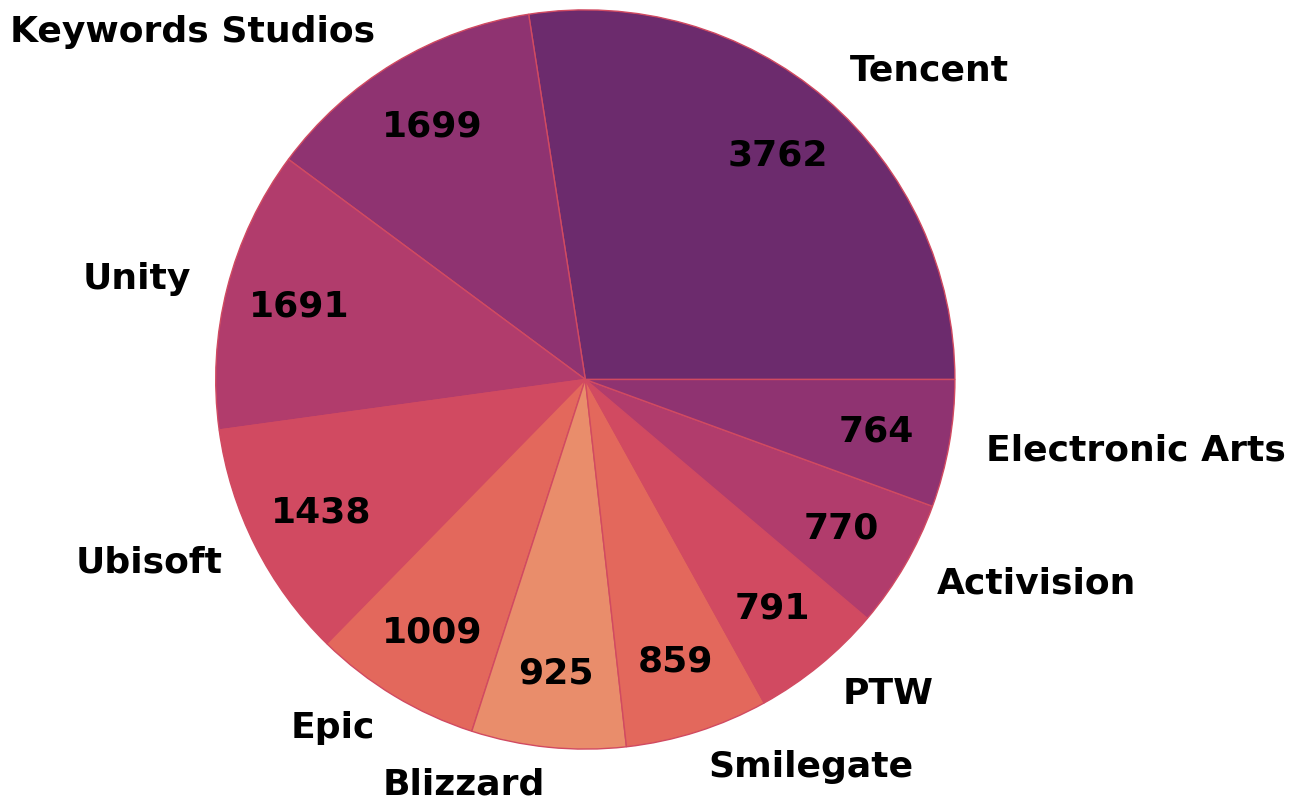

<span style="color:orange; font-size: 40px;">Top Ten Companies By Open Positions</span>

In [3]:
most_openings = df.sort_values(by=['Total Jobs'], ascending=False).reset_index()
get_num = lambda n: int(total_jobs * n/100) + 1

company_colors = sns.color_palette("flare_r") + sns.color_palette("flare")[1:] 
plt.pie(data=most_openings[:10], x='Total Jobs', colors=company_colors,  autopct=get_num,
       radius=2.5, labels=most_openings['Developer/Publisher Name'][:10],
       wedgeprops={'linewidth': 1.0, 'edgecolor': company_colors[7]},  pctdistance=.8,
       textprops={'size': 26, 'weight': 'bold'})

plt.show()
md("""<span style="color:orange; font-size: 40px;">Top Ten Companies By Open Positions</span>""")

### Create Pie Chart for career field spread

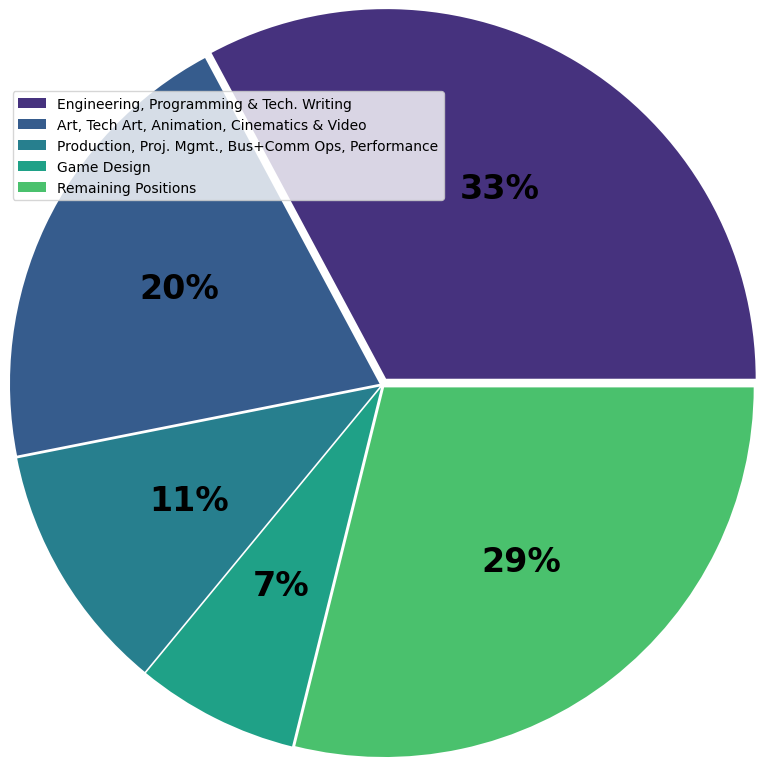

<span style="color:orange; font-size: 150%">
Out of the top fields the <b>Engineering, Programming & Tech. Writing</b> field 
has the most open positions, with a total <b>4499</b> representing a 
significant portion of open positions. Followed by <b>Art, Tech Art, Animation, Cinematics & Video</b> with 
<b>2780</b> open positions.

Leading with a significant margin over the next two fields 
<b>Production, Proj. Mgmt., Bus+Comm Ops, Performance</b> and <b>Game Design</b> with thier respective 
<b>1497 & 973</b> positions. When combined with the aggregate
of the remaining positions, together making up only
<b>47%</b> of the total.
</span>

In [4]:
field_spread = df.sum(axis=0).to_frame(name='Values').iloc[3:].reset_index()
top_labels = {'ept':'Engineering, Programming & Tech. Writing', 
              'ata': 'Art, Tech Art, Animation, Cinematics & Video',
              'ppm': 'Production, Proj. Mgmt., Bus+Comm Ops, Performance',
              'gd': 'Game Design',
              'rp': 'Remaining Positions',
                }

EPT_positions = [df[top_labels[i]].sum() for i in list(top_labels.keys())[:-1]]
RP_positions = field_spread.Values.sum() - sum(EPT_positions)
EPT_positions.append(field_spread.Values.sum() - sum(EPT_positions))

ept_colors = sns.color_palette('viridis')
plt.pie(EPT_positions, colors=ept_colors, autopct='%.0f%%',
        radius=2.5, explode=[0.05, 0.02, 0.02, 0.02, 0.02],
        textprops={'size': 24, 'weight': 'bold'})

plt.legend(labels=top_labels.values(), loc=[-.5, 1])
plt.show()

md(f"""<span style="color:orange; font-size: 150%">
Out of the top fields the <b>{top_labels['ept']}</b> field 
has the most open positions, with a total <b>{int(EPT_positions[0])}</b> representing a 
significant portion of open positions. Followed by <b>{top_labels['ata']}</b> with 
<b>{int(EPT_positions[1])}</b> open positions.

Leading with a significant margin over the next two fields 
<b>{top_labels['ppm']}</b> and <b>{top_labels['gd']}</b> with thier respective 
<b>{EPT_positions[2]} & {EPT_positions[3]}</b> positions. When combined with the aggregate
of the remaining positions, together making up only
<b>{round(sum(EPT_positions[2:])/total_jobs*100)}%</b> of the total.
</span>""")

### Since over 2/3 of the positions were confined to 4 career fields create barplot for remainder of positions

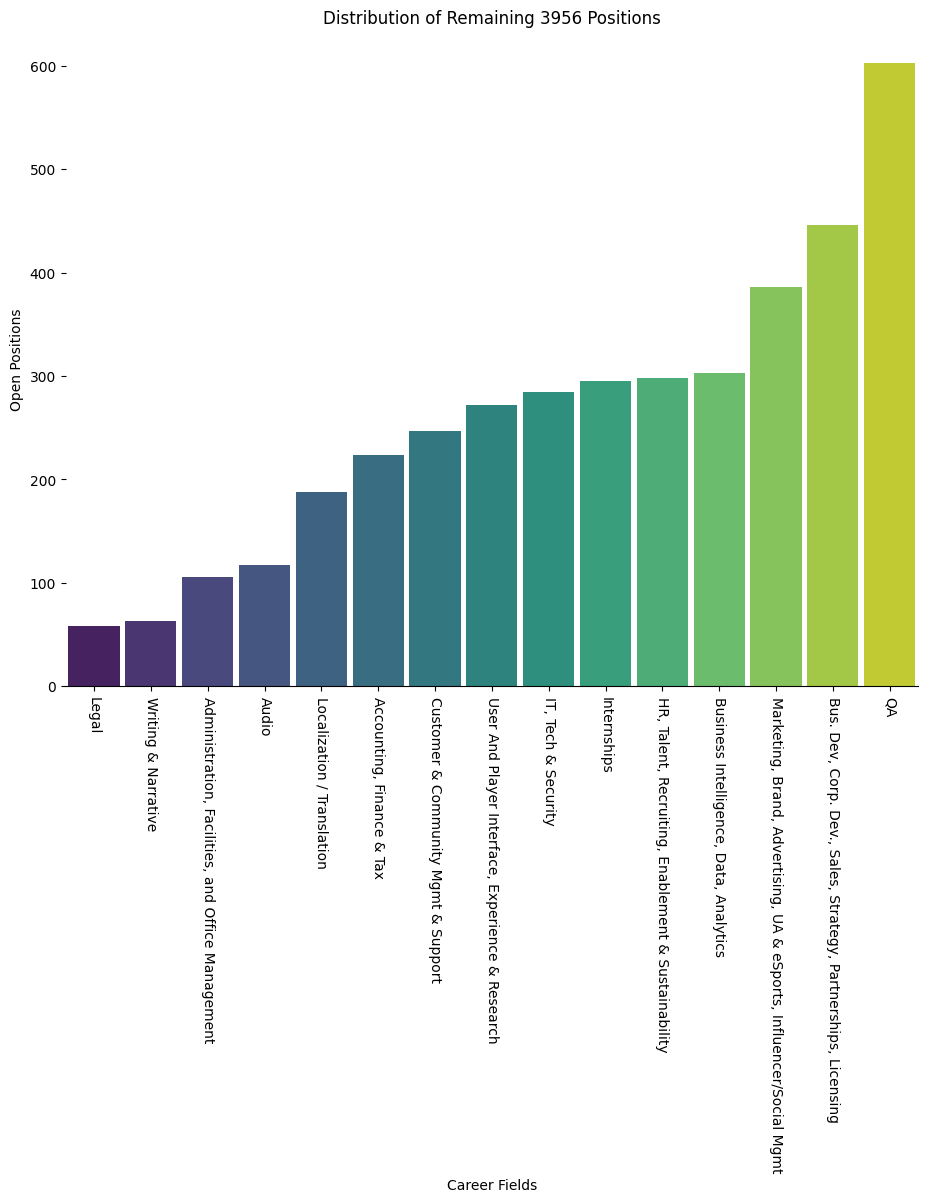

In [5]:

remaining_title = f'Distribution of Remaining {str(EPT_positions[-1])} Positions'
excluded_fields = list(top_labels.values())[:-1]
remaining_spread = field_spread
for i in excluded_fields: remaining_spread = remaining_spread[remaining_spread['index'] != i]
    
remaining_spread = remaining_spread.sort_values(by='Values')

ax = sns.barplot(data=remaining_spread.iloc[2:],
                 x='index', y='Values', width=.9, palette='viridis')
ax.set(title=remaining_title)
ax.set(ylabel='Open Positions', xlabel='Career Fields')
ax.figure.set_size_inches(11,8.5)
sns.despine(left=True)
plt.xticks(rotation=-90)
plt.show()
